In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing




Using TensorFlow backend.


In [2]:

path = "."
filename_read = os.path.join(path, "All_data_patients_correct.csv")
patient_all = pd.read_csv(filename_read)
PAL = patient_all
print("All patients", PAL.head())
PAL = shuffle(PAL)
print("All patients shuffled\n",PAL.head())
print("Patients data size", PAL.shape)

min_max_scaler = preprocessing.MinMaxScaler()
PAL[['heartbeat']] = min_max_scaler.fit_transform(PAL[['heartbeat']].values)

print("\nPatients data normalized heartbeat\n", PAL.head())

result = []
for x in PAL.columns:
    if x != 'label':
        result.append(x)

X = PAL[result].values
X = np.delete(X,0,1)
y = PAL['label'].values
print("X data \n", X[0:5])

All patients     time         x         y         z  heartbeat  label
0    0.0  0.184021  0.679169 -0.476990       87.0     -1
1   30.0 -0.301010  0.805710  0.487167       95.0     -1
2   60.0 -0.323517  0.923447  0.146362       84.0     -1
3   90.0 -0.509674  0.855102 -0.049118       85.0     -1
4  120.0 -0.387756  0.919067  0.023758       82.0     -1
All patients shuffled
           time         x         y         z  heartbeat  label
15630   8400.0 -0.217285  0.252640 -0.935516       59.0      3
19031  19740.0 -0.562546  0.045792 -0.828430       60.0      2
20927  19260.0  0.204865 -0.244324  0.953003       58.0      2
9840    3330.0 -0.289093 -0.171799 -0.940628       53.0      3
3890    6060.0  0.786438 -0.040527 -0.616989       68.0      3
Patients data size (25781, 6)

Patients data normalized heartbeat
           time         x         y         z  heartbeat  label
15630   8400.0 -0.217285  0.252640 -0.935516   0.202247      3
19031  19740.0 -0.562546  0.045792 -0.828430   0.21

In [4]:

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.svm import SVC
from sklearn.utils import shuffle



result = []
first_patient = PAL
first_patient = shuffle(first_patient)
#first_patient = first_patient.reindex(np.random.permutation(first_patient.index))

#print(first_patient.head())

for x in first_patient:
    if x != 'label':
        result.append(x)
        
    
X = first_patient[result].values
print(X)

y = first_patient['label'].values

labels = first_patient.label

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)



smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

model = SVC(gamma = 'scale', decision_function_shape = 'ovo', kernel = 'poly', C = 1000)
model.fit(X_train,y_train)
    
y_pred = model.predict(X_test)

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_compare)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Confusion matrix, without normalization')
print(cm)
#normalised confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized,labels, title='Normalized confusion matrix')
plt.show()

[[ 1.45e+04 -5.04e-01  1.56e-02 -8.50e-01  2.47e-01]
 [ 7.89e+03 -4.63e-01  1.11e-02 -8.77e-01  2.92e-01]
 [ 1.02e+04 -4.05e-01 -3.79e-01 -8.39e-01  3.60e-01]
 ...
 [ 5.70e+03 -3.16e-01 -8.81e-01  3.50e-01  1.24e-01]
 [ 7.83e+03 -1.57e-01  8.74e-01 -4.51e-01  2.36e-01]
 [ 9.42e+03 -4.09e-01 -1.36e-01 -8.95e-01  3.15e-01]]


The accuracy is:  20.96179949583091 %
   Actual  Predicted
0       0          5
1       1          5
2       5          5
3       5          5
4       2          4
Accuracy: 0.21
Confusion matrix, without normalization
[[  71    5    0    0    1    1    3]
 [ 101   60   15    0   20   86  147]
 [  16   25   10    0   21   85  163]
 [  35  121  117    0  190  856 1218]
 [   0   21    9    0  229  284   94]
 [   0    0    3    0   11   40    9]
 [  25    3   76    0    7  308  671]]
Normalized confusion matrix
[[0.88 0.06 0.   0.   0.01 0.01 0.04]
 [0.24 0.14 0.03 0.   0.05 0.2  0.34]
 [0.05 0.08 0.03 0.   0.07 0.27 0.51]
 [0.01 0.05 0.05 0.   0.07 0.34 0.48]
 [0.   0.03 0.01 0.   0.36 0.45 0.15]
 [0.   0.   0.05 0.   0.17 0.63 0.14]
 [0.02 0.   0.07 0.   0.01 0.28 0.62]]


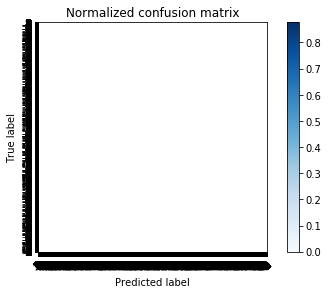

In [6]:
 from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_pred, y_test)

#accuracy = cross_validate(Random_Forest_model,X,Y,cv=5)['test_score']
print('The accuracy is: ',accuracy*100,'%')
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).head()
print(df_compare)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print('Confusion matrix, without normalization')
print(cm)
#normalised confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized,labels, title='Normalized confusion matrix')
plt.show()